In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import spotipy
import scipy.stats as st
from scipy.optimize import curve_fit
import numpy as np

from config import credentials
# Import API key
from config import api_key
#from config import token

In [29]:
user_id='me'
kind='artists' #tracks
limit=50
token='BQBq1VYKh-2nFMRPALdgfs0iH9P9y0VltYOnbKwUzR_FxBcFgjDryUxO2d5r6uQDIsPVZRKjiBxrh2YYyfAG_PgVQXfKFc71GLhSfjNlME_E0lwiCgatmlodCyuSujmNQ8ksbPGrbPsj2EBgHQ5gEdDaPgTzTCy7fHWhvI3ks8c'


params={'time_range':'long_term','limit' : limit}
headers={"Accept": "application/json","Content-Type": "application/json","Authorization": 
         (f"Bearer {token}")}

#medium_term, short term

base_url=f'https://api.spotify.com/v1/{user_id}/top/{kind}?'#{api_key}'    #{timeframe}/{api_key}


In [30]:
#https://api.spotify.com/v1/me/top/artists?time_range=long_term&limit=20

In [31]:
user_data = requests.get(base_url,headers = headers,params=params).json()

artists=[]
genres=[]
popularity=[]
for i in range(limit):

    artists.append(user_data['items'][i]['name'])
    genres.append(user_data['items'][i]['genres'])
    popularity.append(user_data['items'][i]['popularity'])


In [32]:
user_data['items'][0]['genres']

['canadian hip hop',
 'canadian pop',
 'hip hop',
 'pop rap',
 'rap',
 'toronto rap']

In [33]:
top50_df=pd.DataFrame({'artist':artists,
                       'genres':genres,
                       'popularity':popularity})
top50_df

,artist,genres,popularity
0,Drake,"[canadian hip hop, canadian pop, hip hop, pop ...",99
1,Ben Howard,"[british singer-songwriter, fingerstyle, folk-...",72
2,Noah Gundersen,"[acoustic pop, alternative roots rock, indie f...",56
3,The 1975,"[indie pop, modern alternative rock, modern ro...",85
4,ILLENIUM,"[edm, electropop, melodic dubstep, pop, tropic...",81
5,Charli Adams,"[hopebeat, indie cafe pop, nashville singer-so...",45
6,RADWIMPS,"[j-pop, j-rock, japanese emo, visual kei]",76
7,ODESZA,"[chillwave, ninja]",75
8,Jai Wolf,"[edm, electropop, indie poptimism, indietronic...",65
9,James Blake,"[art pop, indie r&b, indie soul, uk alternativ...",74


In [23]:
#top50_df['genres'].value_counts
genres = pd.Series([x for item in top50_df.genres for x in item]).value_counts().reset_index()
genres=genres.rename(columns={'index':'genre',0:'count'})
print(genres.head(20))
genre_list = genres['genre'].tolist()
genre_list = sorted(genre_list)
genre_list
print(len(genre_list))

               genre  count
0                pop     13
1         electropop     12
2          indie pop     12
3   stomp and holler     11
4       indietronica     10
5    indie poptimism      9
6         indie folk      9
7        modern rock      8
8         neo mellow      7
9         vapor soul      6
10               edm      5
11          pop rock      5
12    tropical house      4
13           pop rap      4
14          folk-pop      4
15           art pop      4
16     indiecoustica      4
17               rap      4
18         dance pop      3
19          hopebeat      3
95


In [8]:
#genres['genre'] = genres['genre'].replace({'korean pop': 'k-pop',
#                                           'k-pop girl group':'k-pop',
#                                           'anime score':'anime',
#                                           'anime rock':'anime'})
top_genres=genres.iloc[:30,:]
#genres['count']

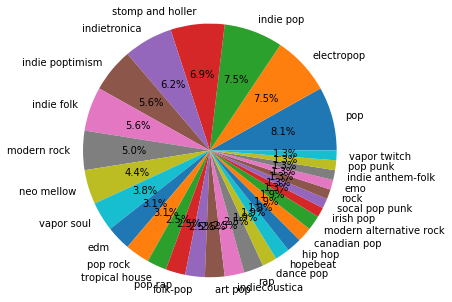

In [9]:
#use these columns for parameters for the pie chart
counts = top_genres['count']
genres = top_genres['genre']
#explode = 

#found a bunch of colors here
#https://matplotlib.org/3.1.0/gallery/color/named_colors.html
#colors = ["magenta","deepskyblue"]
#contruct plot
plt.figure(figsize = (5,5))
plt.pie(counts,labels=genres, autopct="%.1f%%", )
#plt.title("Mice Gender Distribution")
plt.axis("equal")
plt.show()

In [10]:
popularity_df=top50_df.sort_values('popularity',ascending=False)
popularity_df

,artist,genres,popularity
0,Drake,"[canadian hip hop, canadian pop, hip hop, pop ...",99
29,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]",97
16,Kygo,"[edm, pop, tropical house]",91
23,Kanye West,"[chicago rap, hip hop, rap]",91
11,Calvin Harris,"[dance pop, edm, electro house, house, pop, pr...",88
30,JAY-Z,"[east coast hip hop, hip hop, pop rap, rap]",87
21,Twenty One Pilots,"[modern rock, rock]",87
3,The 1975,"[indie pop, modern alternative rock, modern ro...",85
27,John Mayer,"[neo mellow, pop, pop rock, singer-songwriter]",84
45,PARTYNEXTDOOR,"[pop, pop rap, rap, toronto rap, trap, urban c...",83


In [11]:
mean_pop=popularity_df.mean()
print(popularity_df.mean())

popularity    68.32
dtype: float64


In [12]:
monthly_listen=[31136355,19892244,5786789,19696892,8810802,4920540,6070574,2326642,4342067,7287210,2764446,2604646,
                4348878,4560359,2807877,1711729,2132838,2207593,1977451,1904265,999429,1423244,1654735,1925133,
               1445701,945814,1793936,1461294,1458824,820964,1734413,855722,783786,1184485,559604,928138,1055185,
               853462,1420310,1021964,436136,869287,896391,678255,307237,304716,374888,106790,337555,12476]

In [13]:
len(monthly_listen)

50

In [14]:
poppy=popularity_df['popularity'].tolist()

pops=[97,95,91,95,84,89,89,73,83,87,89,91,86,78,86]
listens=[60696365,55170241,41987269,48867520,21692661,21024536,21487306,7642605,1704122,24823631,
        19651875,35018530,15602696,7057663,28074532]

poppy=poppy+pops
monthly_listen=monthly_listen+listens

x_axis=poppy
y_axis=monthly_listen
len(y_axis)

65

In [15]:
https://open.spotify.com/artist/6S2OmqARrzebs0tKUEyXyp?si=NHujpOOmS_i08KhJARSZEg

SyntaxError: invalid syntax (<ipython-input-15-720270d9de84>, line 1)

In [16]:
def exponential(x, a, b):
    return a*np.exp(b*x)

In [17]:
pars, cov = curve_fit(f=exponential, xdata=x_axis, ydata=y_axis, p0=[0, 0], bounds=(-np.inf, np.inf))

In [18]:
x1=np.arange(min(poppy),max(poppy)+1,1)
line_1 = pars[0]*np.exp(pars[1]*x1)

In [19]:
listeners=pars[0]*np.exp(pars[1]*mean_pop)
int(round(listeners,0))

2129612

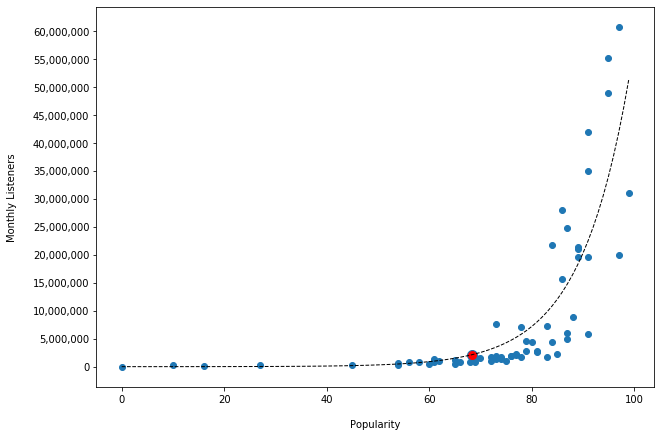

In [20]:
plt.figure(figsize=(10,7))
plt.yticks(np.arange(0,80000000,5000000))
plt.scatter(x_axis,y_axis)
plt.ylabel('Monthly Listeners\n')
plt.xlabel('\nPopularity')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.plot(mean_pop,listeners,markerfacecolor='red',marker="o",markersize=10)
plt.plot(x1, line_1, linestyle='--', linewidth=1, color='black')
plt.show()